In [1]:
%%bash

pip install -q kaggle
mkdir -p ~/.kaggle
cp drive/MyDrive/kaggle.json ~/.kaggle/
chmod 600 /root/.kaggle/kaggle.json
kaggle datasets download -d heemalichaudhari/airlines-delay

100%|██████████| 66.6M/66.6M [00:00<00:00, 95.6MB/s]


In [2]:
!unzip airlines-delay.zip

Archive:  airlines-delay.zip
  inflating: DelayedFlights.csv      
  inflating: st99_d00.dbf            
  inflating: st99_d00.shp            
  inflating: st99_d00.shx            


# Airlines Delay

## Getting the data

In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 20.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv("DelayedFlights.csv")
df_gp = gpd.GeoDataFrame.from_file("st99_d00.shp")

## Exploring the data

In [5]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


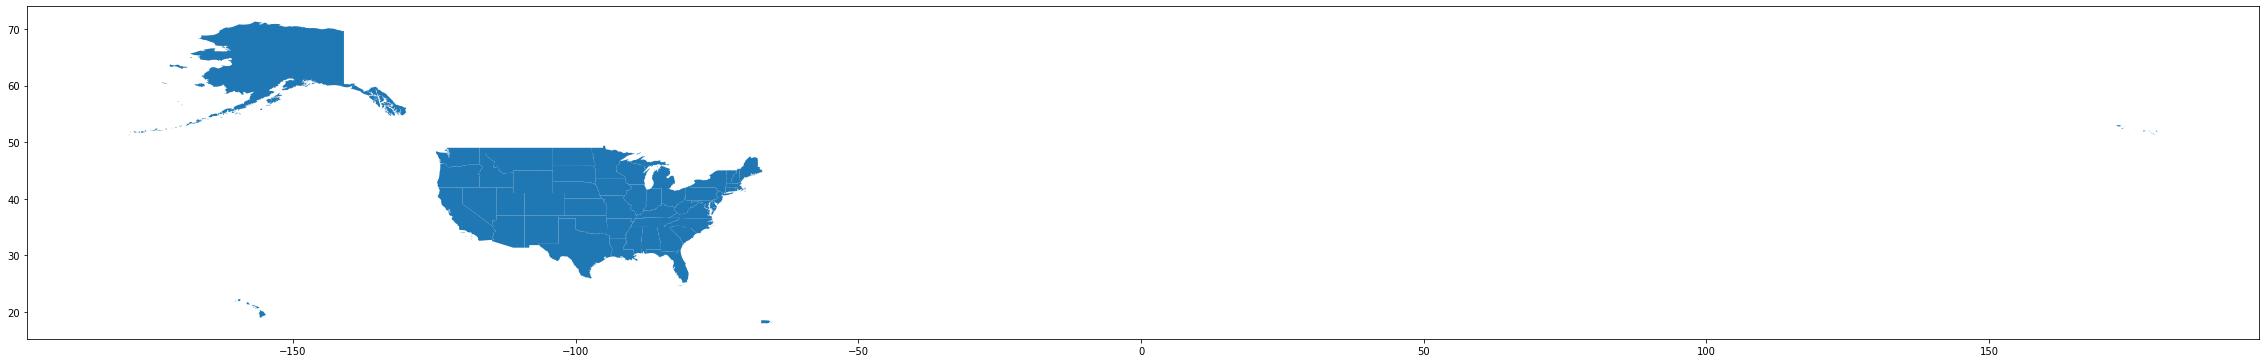

In [6]:
import matplotlib.pyplot as plt

df_gp.plot(figsize=(40, 40))
plt.show()

In [7]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


## Cleansing Data

In [8]:
df.isna().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [10]:
import numpy as np

for stuff in df.keys():
  if pd.api.types.is_object_dtype(df[stuff]) == False:
    print(stuff)
    df[stuff].fillna(np.mean(df[stuff]), inplace=True)

Unnamed: 0
Year
Month
DayofMonth
DayOfWeek
DepTime
CRSDepTime
ArrTime
CRSArrTime
FlightNum
ActualElapsedTime
CRSElapsedTime
AirTime
ArrDelay
DepDelay
Distance
TaxiIn
TaxiOut
Cancelled
Diverted
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay


In [11]:
df.isna().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              5
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [12]:
df["TailNum"].dropna(inplace=True)
df.drop("Unnamed: 0", inplace=True, axis=1)

In [13]:
df.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              5
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [14]:
len(df)

1936758

## Pre-Processing Data

In [15]:
from sklearn.preprocessing import LabelEncoder

for stuff in df.keys():
  if pd.api.types.is_object_dtype(df[stuff]):
    le = LabelEncoder()
    print(stuff)
    print("-"*20)
    df[stuff] = le.fit_transform(df[stuff])
    print(le.classes_)

UniqueCarrier
--------------------
['9E' 'AA' 'AQ' 'AS' 'B6' 'CO' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW' 'OH'
 'OO' 'UA' 'US' 'WN' 'XE' 'YV']
TailNum
--------------------
['80009E' '80019E' '80059E' ... 'NHZOAL' 'Unknow' nan]
Origin
--------------------
['ABE' 'ABI' 'ABQ' 'ABY' 'ACK' 'ACT' 'ACV' 'ACY' 'ADK' 'ADQ' 'AEX' 'AGS'
 'AKN' 'ALB' 'ALO' 'AMA' 'ANC' 'ASE' 'ATL' 'ATW' 'AUS' 'AVL' 'AVP' 'AZO'
 'BDL' 'BET' 'BFL' 'BGM' 'BGR' 'BHM' 'BIL' 'BIS' 'BJI' 'BLI' 'BMI' 'BNA'
 'BOI' 'BOS' 'BPT' 'BQK' 'BQN' 'BRO' 'BRW' 'BTM' 'BTR' 'BTV' 'BUF' 'BUR'
 'BWI' 'BZN' 'CAE' 'CAK' 'CDC' 'CDV' 'CEC' 'CHA' 'CHO' 'CHS' 'CIC' 'CID'
 'CLD' 'CLE' 'CLL' 'CLT' 'CMH' 'CMI' 'CMX' 'COD' 'COS' 'CPR' 'CRP' 'CRW'
 'CSG' 'CVG' 'CWA' 'DAB' 'DAL' 'DAY' 'DBQ' 'DCA' 'DEN' 'DFW' 'DHN' 'DLG'
 'DLH' 'DRO' 'DSM' 'DTW' 'EGE' 'EKO' 'ELM' 'ELP' 'ERI' 'EUG' 'EVV' 'EWN'
 'EWR' 'EYW' 'FAI' 'FAR' 'FAT' 'FAY' 'FCA' 'FLG' 'FLL' 'FLO' 'FNT' 'FSD'
 'FSM' 'FWA' 'GCC' 'GEG' 'GFK' 'GGG' 'GJT' 'GNV' 'GPT' 'GRB' 'GRK' 'GRR'
 'GSO' 'GSP' 'GST' '

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop("LateAircraftDelay", axis=1)
y = df["LateAircraftDelay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training the Data

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [18]:
rfr = RandomForestRegressor().fit(X_train, y_train)
rfr.score(X_test, y_test)

0.9961400060186686

In [ ]:
svreg = SVR().fit(X_train, y_train) 
svreg.score(X_test, y_test)

In [ ]:
knreg = KNeighborsRegressor().fit(X_train, y_train) 
knreg.score(X_test, y_test)

In [ ]:
xgreg = XGBRegressor().fit(X_train.values, y_train.values)
xgreg.score(X_test.values, y_test.values)